In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
df = pd.read_csv('Wholesale customers data.csv')

In [8]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


<AxesSubplot:>

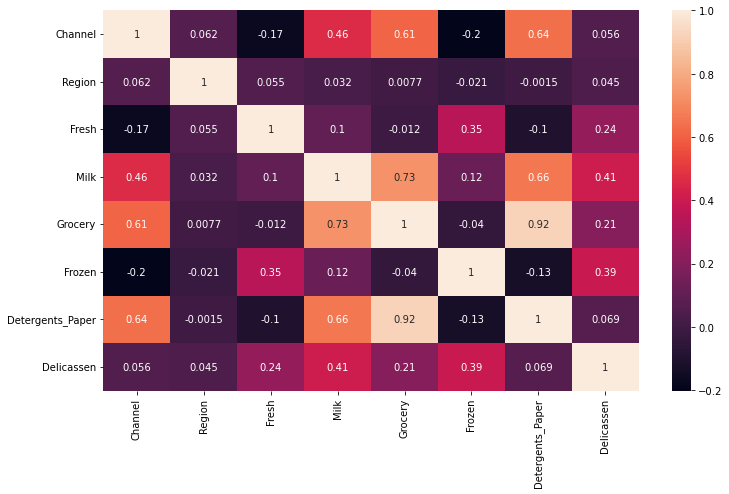

In [12]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True)

In [21]:
from sklearn.preprocessing import StandardScaler

df = StandardScaler().fit_transform(df)

In [22]:
cov_mat = np.cov(df.T)

In [23]:
EVal , EVec = np.linalg.eig(cov_mat)

In [24]:
sorted(EVal, reverse=True)[:5]

[3.1070713587427354,
 1.7940444097416155,
 1.014078600276006,
 0.7400742845030219,
 0.557900353018173]

In [33]:
#Lets have a look at the variance retention
nsum = 0
count = 0
for i in sorted(EVal, reverse=True):
    nsum += i/np.sum(EVal)
    if nsum > 0.85:
        count += 1
        break
    else:
        count += 1
    
print('We have to consider {} components while retaining 85% variance'.format(count))

We have to consider 5 components while retaining 85% variance


so the value of n_components will be 5 while getting the PCA.

In [42]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)

pca_df = pca.fit_transform(df)

In [43]:
new_df = pd.DataFrame(pca_df)

In [44]:
new_df

,0,1,2,3,4
0,0.843939,-0.515351,-0.767632,-0.044215,-0.446234
1,1.062676,-0.484601,-0.672975,0.401372,-0.130458
2,1.269141,0.682055,-0.664095,1.634953,-1.193813
3,-1.056782,0.610821,-0.505654,0.196005,0.457855
4,0.634030,0.974199,-0.771209,0.186374,-0.813877
...,...,...,...,...,...
435,0.222884,2.480505,-0.360936,-0.601036,1.109212
436,-1.290172,1.560397,-0.756171,-1.342401,-0.533462
437,3.865149,-0.479854,-0.525345,-0.687132,0.108968
438,-1.097067,-0.069896,-0.630128,0.311821,-0.424792
